# Laboratory work 1: Numerical differentiation

---

## Work objective:

To determine estimation errors for some numerical differentiation methods and their dependency on the
size of the step on the example of certain functions.

## Given functions:

- $\displaystyle \sin{(x^2)}$

- $\displaystyle \cos{(\sin{(x)})}$

- $\displaystyle e^{\sin{(\cos{(x)})}}$

- $\displaystyle \ln{(x + 3)}$

- $\displaystyle \sqrt{x + 3}$

## Step size:

- $\displaystyle h_n = \frac{2}{2^n}$, $n \in [1; 21]$

## Numerical differentiation formulas:

- $\displaystyle \frac{f(x + h) - f(x)}{h}$

- $\displaystyle \frac{f(x) - f(x - h)}{h}$

- $\displaystyle \frac{f(x + h) - f(x - h)}{2h}$

- $\displaystyle \frac{4}{3}\frac{f(x + h) - f(x - h)}{2h} -
                 \frac{1}{3}\frac{f(x + 2h) - f(x - 2h)}{4h}$

- $\displaystyle \frac{3}{2}\frac{f(x + h) - f(x - h)}{2h} -
                 \frac{3}{5}\frac{f(x + 2h) - f(x - 2h)}{4h} +
                 \frac{1}{10}\frac{f(x + 3h) - f(x - 3h)}{6h}$

---

## Note

All derivatives were calculated at a point x = 9 (the last digit of my academic group)

---

In [322]:
import numpy as np
from matplotlib import pyplot as plt

In [323]:
class Function:
    def __init__(self, func, derivative, name):
        self.func_ = func
        self.derivative_ = derivative
        self.name_ = name

class Num_Derivative:
    def __init__(self, func, name, color):
        self.func_ = func
        self.name_ = name
        self.color_ = color

In [324]:
func_list = [Function(lambda x: np.sin(x * x),
                      lambda x: 2.0 * x * np.cos(x * x),
                      "$\\sin{(x^2)}$"),
             Function(lambda x: np.cos(np.sin(x)),
                      lambda x: -np.cos(x) * np.sin(np.sin(x)),
                      "$\cos{(\\sin{(x)})}$"),
             Function(lambda x: np.exp(np.sin(np.cos(x))),
                      lambda x: -np.sin(x) * np.cos(np.cos(x)) * np.exp(np.sin(np.cos(x))),
                      "$e^{\\sin{(\\cos{(x)})}}$"),
             Function(lambda x: np.log(x + 3.0),
                      lambda x: 1.0 / (x + 3.0),
                      "$\\ln{(x + 3)}$"),
             Function(lambda x: np.sqrt(x + 3),
                      lambda x: 1.0 / (2.0 * np.sqrt(x + 3.0)),
                      "$\\sqrt{x + 3}$")]

In [325]:
def numerical_derivative_1 (f, x, h):
    return (f(x + h) - f(x)) / h

def numerical_derivative_2 (f, x, h):
    return (f(x) - f(x - h)) / h

def numerical_derivative_3 (f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def numerical_derivative_4 (f, x, h):
    return 2 * (f(x + h) - f(x - h)) / (3 * h) \
             - (f(x + 2*h) - f(x - 2*h)) / (12 * h)

def numerical_derivative_5 (f, x, h):
    return 3 * (f(x + h) - f(x - h)) / (4 * h) \
         - 3 * (f(x + 2*h) - f(x - 2*h)) / (20 * h) \
             + (f(x + 3*h) - f(x - 3*h)) / (60 * h)

derivatives_list = [Num_Derivative(numerical_derivative_1,
                                   "$\\frac{f(x + h) - f(x)}{h}$",
                                   "red"),
                    Num_Derivative(numerical_derivative_2,
                                   "$\\frac{f(x) - f(x - h)}{h}$",
                                   "orange"),
                    Num_Derivative(numerical_derivative_3,
                                   "$\\frac{f(x + h) - f(x - h)}{2h}$",
                                   "yellow"),
                    Num_Derivative(numerical_derivative_4,
                                   "$\\frac{4}{3}\\frac{f(x + h) - f(x - h)}{2h} -\
                                     \\frac{1}{3}\\frac{f(x + 2h) - f(x - 2h)}{4h}$",
                                   "green"),
                    Num_Derivative(numerical_derivative_5,
                                   "$\\frac{3}{2}\\frac{f(x + h) - f(x - h)}{2h} - \
                                     \\frac{3}{5}\\frac{f(x + 2h) - f(x - 2h)}{4h} + \
                                     \\frac{1}{10}\\frac{f(x + 3h) - f(x - 3h)}{6h}$",
                                   "blue")]

In [326]:
h = np.geomspace(1, np.power(2.0, -21), num=22, dtype=float)

x_0 = 9

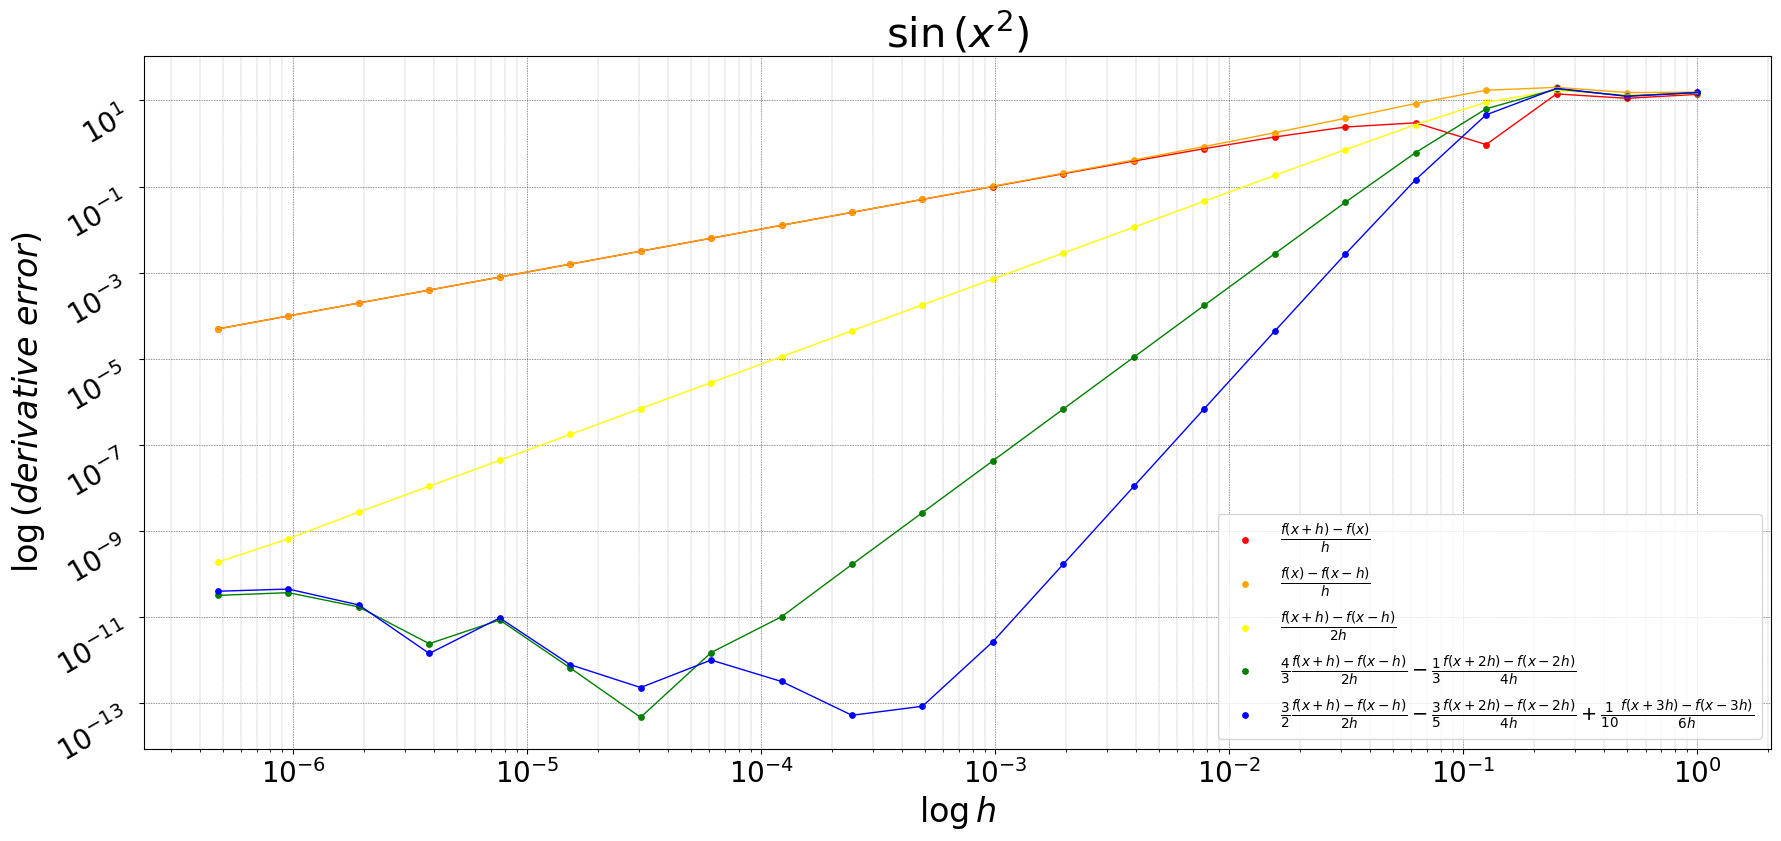

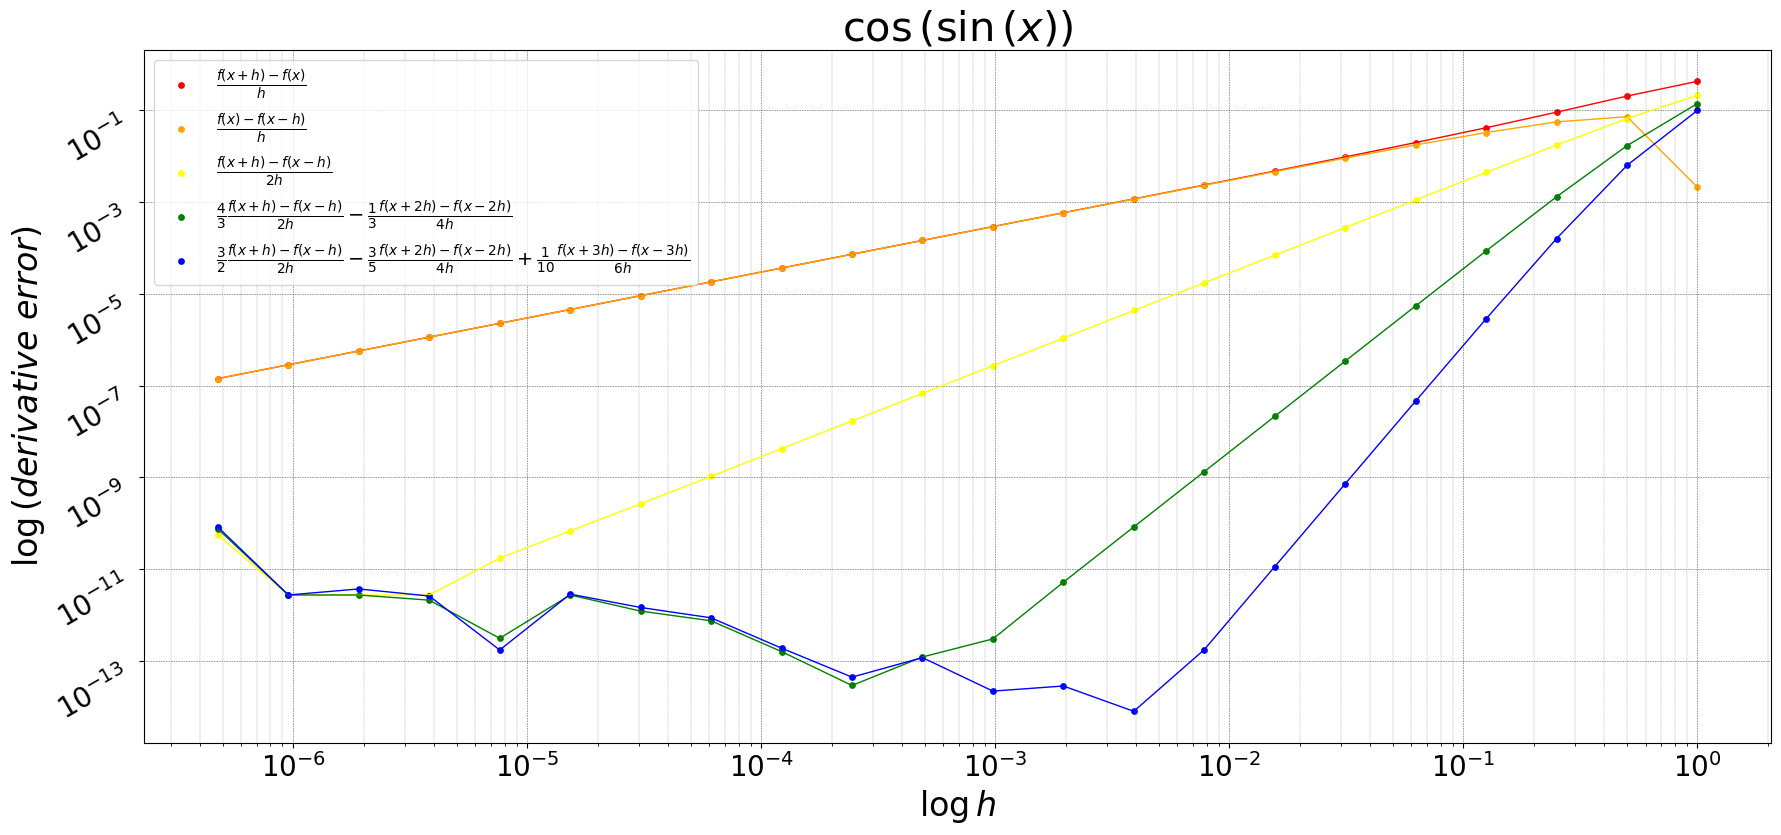

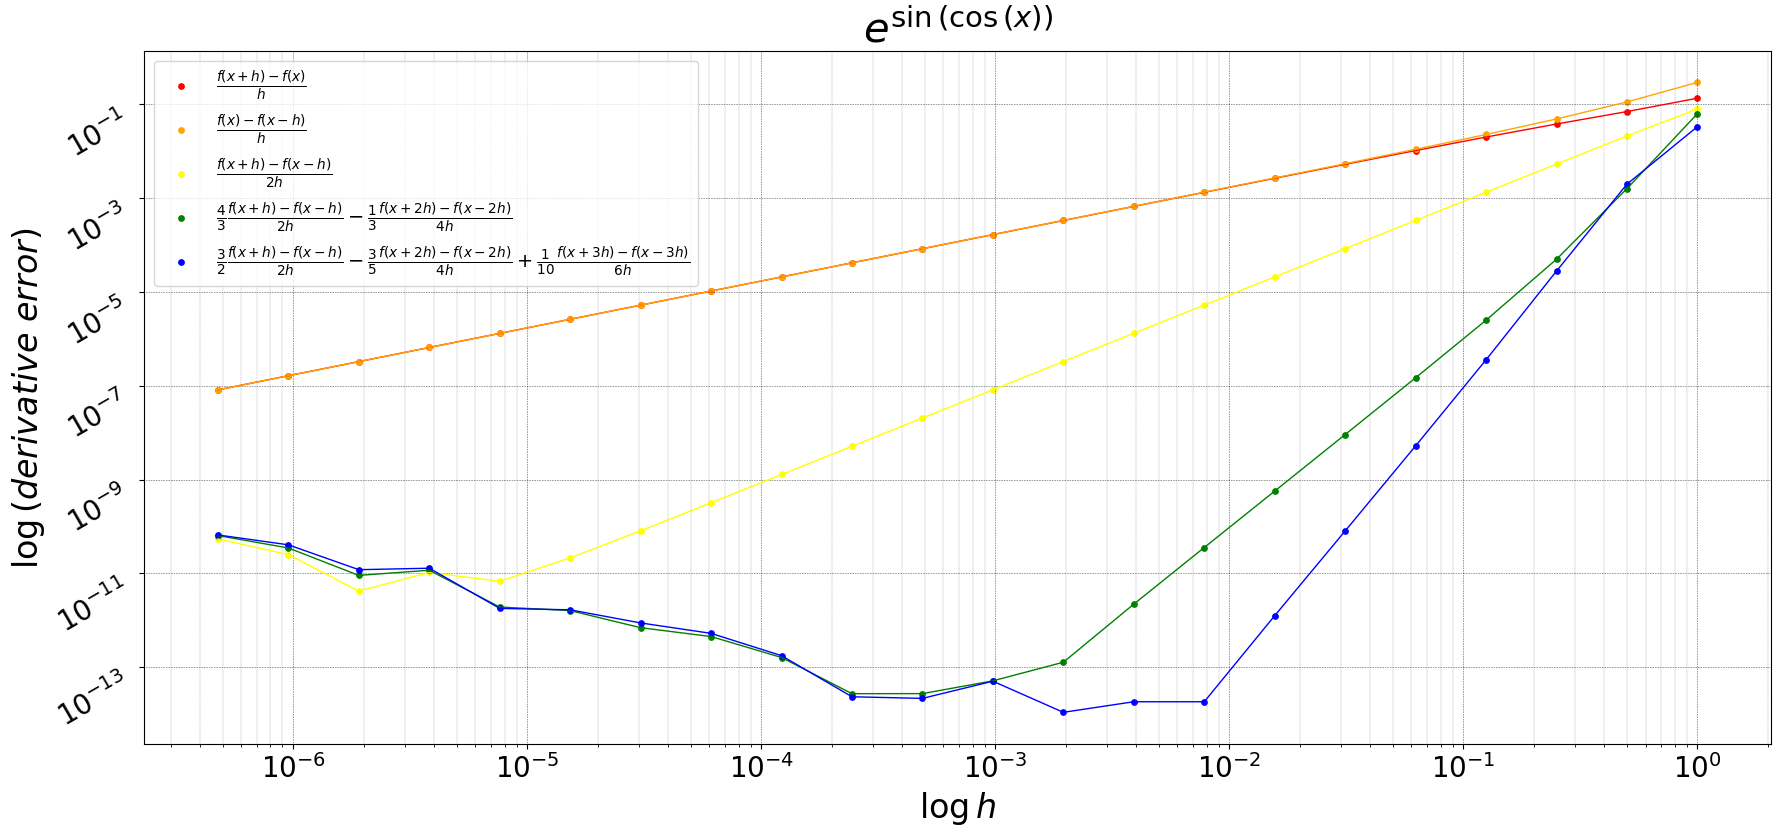

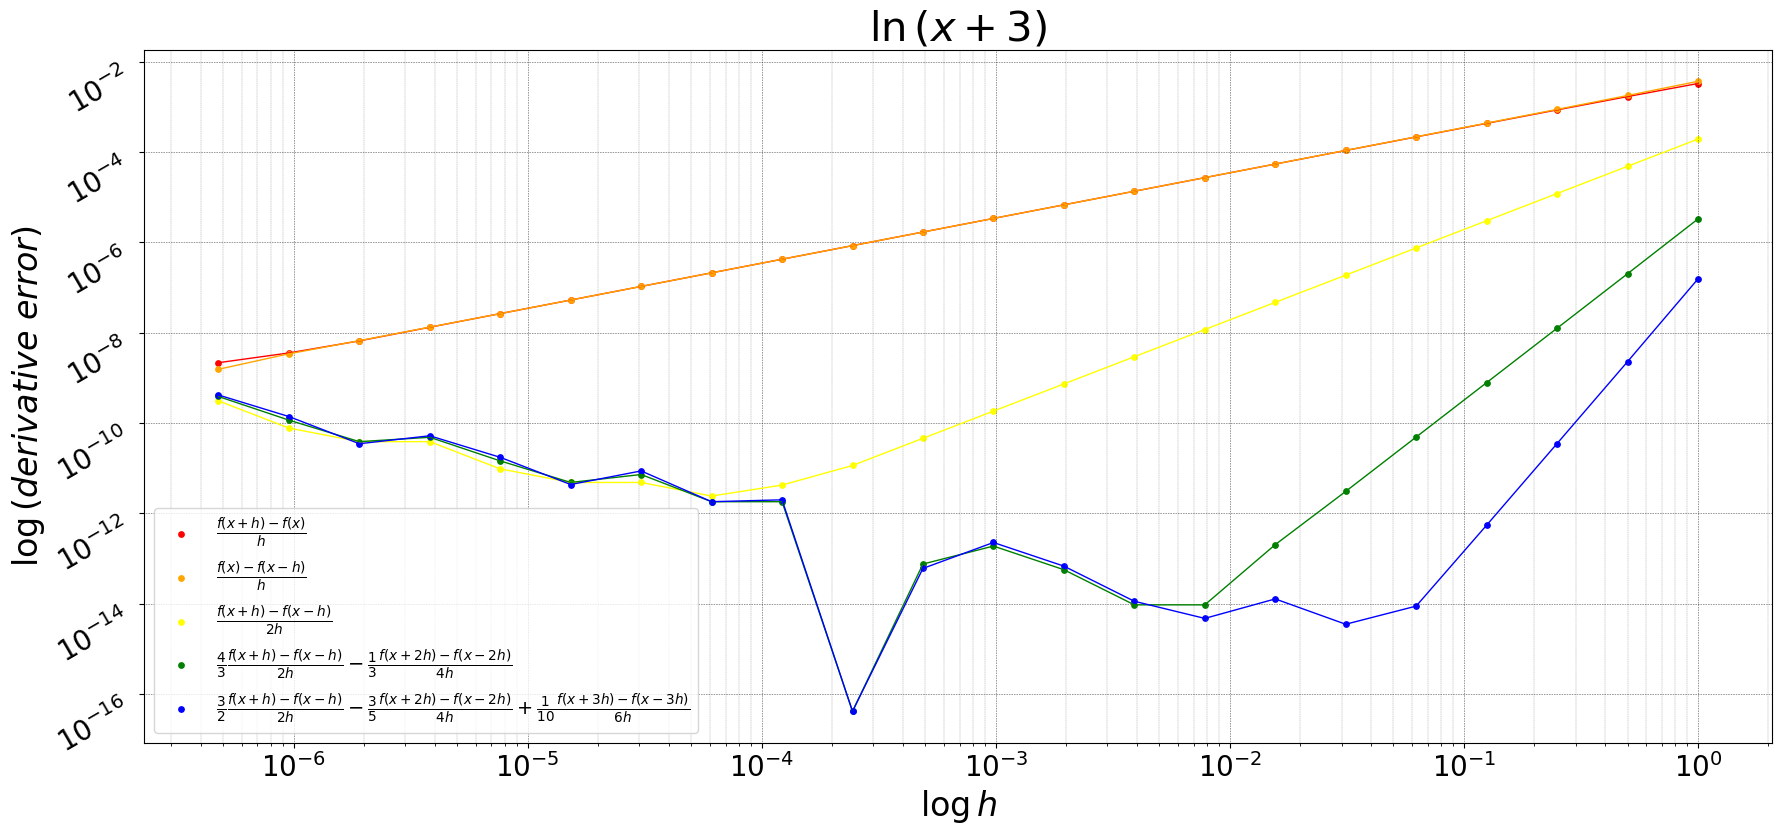

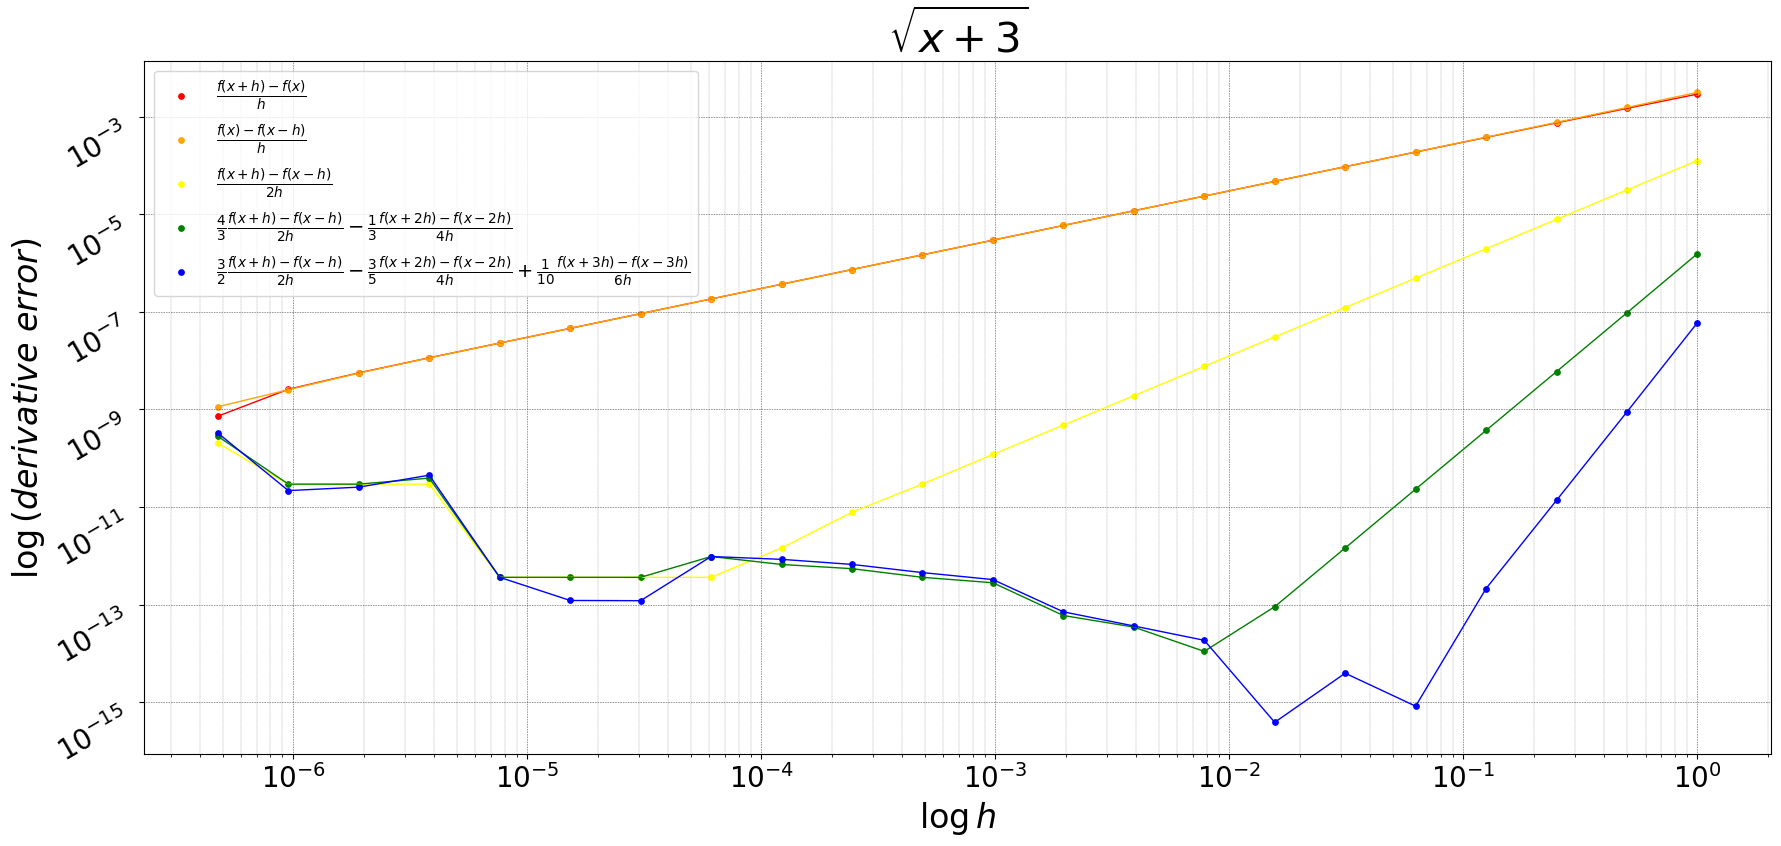

In [327]:
for func in func_list:

    plt.figure (figsize = (21, 9), dpi = 100)
    plt.title(func.name_, fontsize=30)

    plt.xscale("log")
    plt.yscale("log")

    plt.xlabel('$\\log{h}$', fontsize = 24)
    plt.xticks (fontsize = 20, ha = "center", va = "top")

    plt.ylabel("$\\log{(derivative\ error)}$", fontsize = 24)
    plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

    true_derivative = func.derivative_(x_0)

    for derivative in derivatives_list:
        errors = []
        for step in h:
            errors.append(np.abs(derivative.func_(func.func_, x_0, step) - true_derivative))

        plt.scatter (h, errors, s = 15, color = derivative.color_, label=derivative.name_)
        plt.plot (h, errors, color=derivative.color_, linewidth = 1)

    plt.legend (loc = "best", fontsize = 14)

    plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
    plt.minorticks_on()
    plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

    plt.show()